# Compare the number of hologram expsure with the number of spectra

- Author : Sylvie Dagoret-Campagne
- creation date : 2024-02-19
- last update : 2024-02-19
- affiliation : IJCLab/IN2P3/CNRS
- Work with w_2024_07

The goal is to check the number of data available, their date.

## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from spectractor.tools import from_lambda_to_colormap, wavelength_to_rgb
#%matplotlib widget 
import h5py
from scipy import interpolate
from astropy.time import Time

In [2]:
import matplotlib.ticker
%matplotlib inline

In [3]:
import spectractor
from spectractor.simulation.throughput import load_transmission,plot_transmission_simple,TelescopeTransmission
from spectractor import parameters
from spectractor.extractor import dispersers
from spectractor.config import load_config,set_logger
import os,sys

In [4]:
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'
plt.rcParams['legend.fontsize']=  12
plt.rcParams['font.size'] = 12

In [5]:
import lsst.daf.butler as dafButler

repo = "/repo/main"
repo = "/repo/embargo"
# repo = "LATISS"
butler = dafButler.Butler(repo)
registry = butler.registry

for c in sorted(registry.queryCollections()):
    #if "u/jneveu" in c and "auxtel_atmo" in c:
    #if "u/dagoret" in c:
    if "u/dagoret" in c and "auxtel_atmo" in c:
        print(c)

u/dagoret/auxtel_atmo_202101_v3.0.3_doGainsPTC_rebin2_231208
u/dagoret/auxtel_atmo_202101_v3.0.3_doGainsPTC_rebin2_231208/20231220T142452Z
u/dagoret/auxtel_atmo_202209_v3.0.3_doGainsPTC_rebin2_231221
u/dagoret/auxtel_atmo_202209_v3.0.3_doGainsPTC_rebin2_231221/20231221T125249Z
u/dagoret/auxtel_atmo_202301_v3.0.3_doGainsNOPTC_rebin2_231208
u/dagoret/auxtel_atmo_202301_v3.0.3_doGainsNOPTC_rebin2_231208/20231208T215202Z
u/dagoret/auxtel_atmo_202301_v3.0.3_doGainsPTC_rebin2_231208
u/dagoret/auxtel_atmo_202301_v3.0.3_doGainsPTC_rebin2_231208/20231208T211104Z
u/dagoret/auxtel_atmo_202401_v3.0.3_doGainsNOPTC_rebin2_240201
u/dagoret/auxtel_atmo_202401_v3.0.3_doGainsNOPTC_rebin2_240201/20240201T144534Z
u/dagoret/auxtel_atmo_202401_v3.0.3_doGainsNOPTC_rebin2_240215_N149.5
u/dagoret/auxtel_atmo_202401_v3.0.3_doGainsNOPTC_rebin2_240215_N149.5/20240215T190316Z
u/dagoret/auxtel_atmo_202401_v3.0.3_doGainsNOPTC_rebin2_240215_N150
u/dagoret/auxtel_atmo_202401_v3.0.3_doGainsNOPTC_rebin2_240215_N150/2024

## Config

In [6]:
file_specstats ="spec_series_repo_embargo_29jan-15feb2024.csv"
file_exposstats ="exposuresholo_series_repo_embargo_29jan-15feb2024.csv"

## Read file

In [7]:
df_exp = pd.read_csv(file_exposstats)
df_spec = pd.read_csv(file_specstats)

In [9]:
df_exp

,day_obs,countVisitperBandperNight
0,20240129,10
1,20240130,10
2,20240131,2
3,20240205,8
4,20240206,46
5,20240207,12
6,20240212,20
7,20240213,38
8,20240214,20
9,20240215,15


In [10]:
df_spec

,day_obs,countVisitperBandperNight
0,20240129,5
1,20240130,5
2,20240131,2
3,20240205,3
4,20240206,14
5,20240207,4
6,20240212,12
7,20240213,16
8,20240214,13
9,20240215,6


In [14]:
df = df_exp.merge(df_spec, on="day_obs" ,suffixes=('_exp', '_spec'))
df

,day_obs,countVisitperBandperNight_exp,countVisitperBandperNight_spec
0,20240129,10,5
1,20240130,10,5
2,20240131,2,2
3,20240205,8,3
4,20240206,46,14
5,20240207,12,4
6,20240212,20,12
7,20240213,38,16
8,20240214,20,13
9,20240215,15,6


Text(0.5, 1.0, 'Auxtel Spectro Year 2024 nexpo = 181 nspec = 80 ndays = 10 (/repo/embargo)')

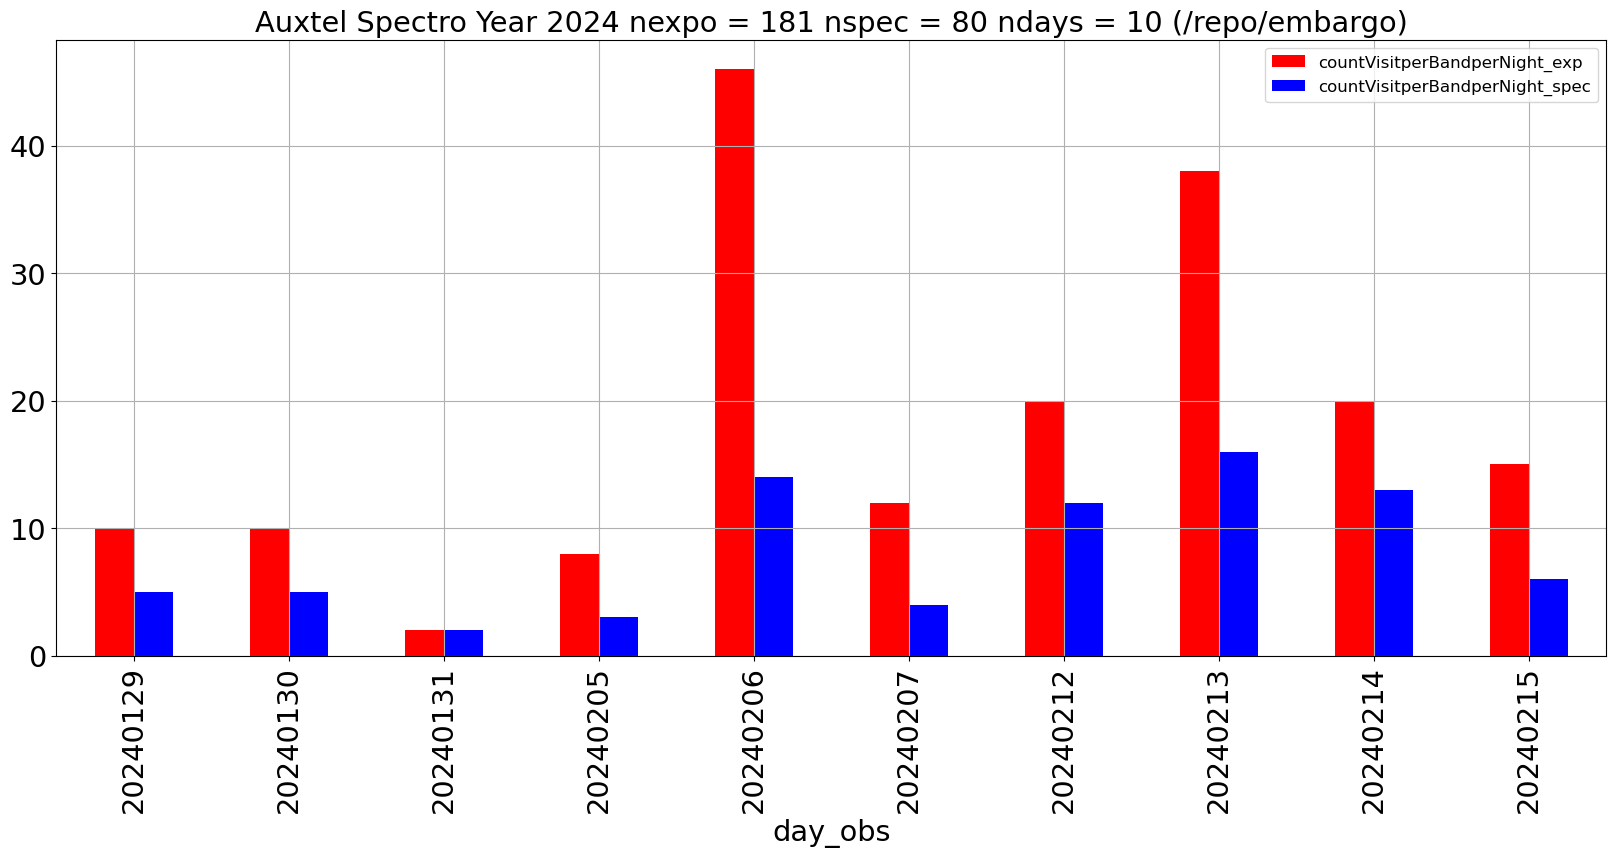

In [19]:
nspec = df["countVisitperBandperNight_spec"].sum()
nexpo = df["countVisitperBandperNight_exp"].sum()
ndays = len(df)
suptitle = f"Auxtel Spectro Year 2024 nexpo = {nexpo} nspec = {nspec} ndays = {ndays} (/repo/embargo)"
fig,ax = plt.subplots(1,1,figsize=(20,8))
df.plot(x='day_obs',kind="bar",ax=ax,grid=True,color=["red","blue"])
ax.set_title(suptitle)

In [20]:
nspec/nexpo

0.4419889502762431